### Presented By: 
#### 1.Akhil Arasada
#### 2.Puppala Uday Bhaskar

### Objectives:

5. To identify the states and regions with the highest incidence of hate crimes.(last)
2. To find if any association exists between the literacy rates of the        states and the overall number of hate crimes committed.
3. To look at the trend of hatecrimes yearwise and
4. To identify where the laws have to be enforced more strictly and if        education/re-education of the masses is necessary.
1. To understand which crimes have chances of occuring together.

#### About The Data:
The data for the crimes has been picked from the National Crime Records Bureau of India. Representing the state wise and district wise crimes against scheduled castes during the years 2001 to 2012. data for the year 2013 is available for the district wise data. Crimes that are recorded here as fields are the Indian Penal Code crimes.
Each record represents the number of each type of crime that occurred where the victim was registered as a person of a scheduled cast. Crimes are recorded regardless of the caste of the offender.
The data for the literacy rates, statewise, across India has been taken from wikipedia (https://en.wikipedia.org/wiki/List_of_Indian_states_and_union_territories_by_literacy_rate) 
which in turn got the information from the census condcted in 2001 and 2011.

### Data descripition:
#### 1. STATE/UT - 
Represents the state name and union teritory name if it is a union teritory (data type-nominal).
#### 2 .DISTRICT - 
District name of that particulat state(data type-nominal).
#### 3. Year - 
specifies to which year data belongs (data type-ordinal).
#### 4. Murder - 
The number of murders that had happened during the year (data type-continuous). 
#### 5. Assault on women       - 
A threat or attempt to inflict offensive physical contact or bodily harm on women (data type-continuous).
#### 6. Kidnapping and Abduction  - 
To take away a person by force (data type-continuous).
#### 7. Dacoity - 
NUmber of acts of violent robbery committed by an armed gang (data type-contiuous).
#### 8. Robbery - 
The action of taking property unlawfully from a person or threat of force (data type-continuous).
#### 9. Arson -
The criminal act of deliberately setting fire to property (data type- continuous).
#### 10. Hurt - 
Hurting a person (data type-continuous).
#### 11. POA Act - 
Crimes that are registered under POA act (data type-continuous).
#### 12. PCR Act - 
Crimes that are registered under PCR act (data type-continuous).
#### 13. Other crimes against sc's - 
Other crimes that are registered against SC's. These have arisen either as a result of breaking of several laws in the above incidences or are unique on their own (data type-continuous).
#### 14. LR-2001 -
The literacy rate for a particular state as reported by the 2001 census.
#### 15. LR-2011 -
The literacy rate for a particular state as reported by the 2011 census.
#### 16. DecDiff -
The difference in LR-2011 and LR-2001, termed in full as decadel diiference.

### Initializing the data

In [1]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
#Loading the datasets
ml=pd.read_csv("ml datasetcrimes.csv")
lr=pd.read_csv("IndiaLR.csv")
eco=pd.read_csv('Eco.csv')
mur=pd.read_csv('Sum.csv')

#### Analysing the data by states

In [4]:
#dropping the years and district columns and grouping it by states in a later dataframe
yeardrop=ml.drop(['Year','DISTRICT'],axis=1)

In [5]:
yeardrop.head()

,STATE/UT,Murder,Assault on women,Kidnapping and Abduction,Dacoity,Robbery,Arson,Hurt,Prevention of atrocities (POA) Act,Protection of Civil Rights (PCR) Act,Other Crimes Against SCs
0,ANDHRA PRADESH,0,1,4,0,0,0,3,0,15,32
1,ANDHRA PRADESH,0,4,0,0,0,0,49,21,0,53
2,ANDHRA PRADESH,3,3,0,0,0,0,38,36,0,34
3,ANDHRA PRADESH,0,3,0,0,0,0,20,52,0,25
4,ANDHRA PRADESH,1,3,0,0,0,0,3,12,63,7


<Figure size 432x288 with 0 Axes>

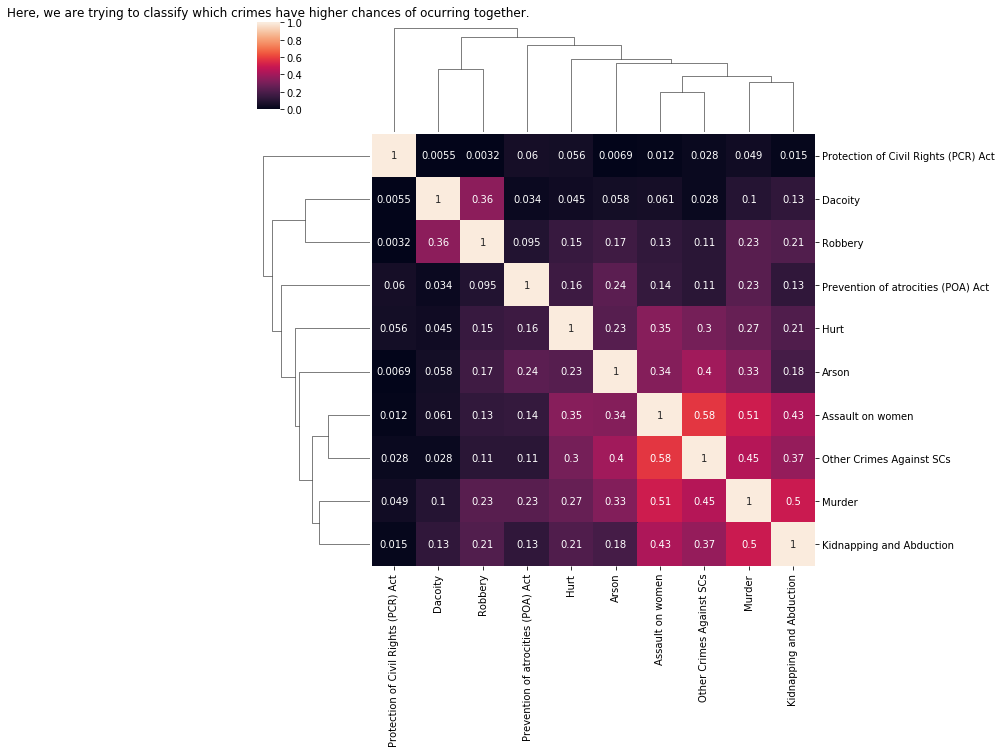

In [6]:
#Generating clustermap i.e it groups numerical variables with high correlation together.
plt.figure()
sns.clustermap(yeardrop.corr(),annot=True)
plt.title('Here, we are trying to classify which crimes have higher chances of ocurring together.')
plt.savefig('CrimeCorr.png')

In [7]:
#Moderate correlation has been observed between the followingcrime categories- Murder, Kidnapping and abduction, Assault on women and other crimes against SC's.
#Thus grouping the ones with more correlation and creating another dataframe.
#Creating a new dataset and summing the crimes by category, statewise.
swise=yeardrop.groupby(['STATE/UT']).sum()
#Summing up all the crimes statewise in a new column.
swise['SumTot']=swise.sum(axis=1)
#Clustering the highly correlated crimes together and creating a new column.
swise['HighCorr']=swise['Assault on women']+swise['Kidnapping and Abduction']+swise['Murder']
swise.reset_index(inplace=True)
swise.head()


,STATE/UT,Murder,Assault on women,Kidnapping and Abduction,Dacoity,Robbery,Arson,Hurt,Prevention of atrocities (POA) Act,Protection of Civil Rights (PCR) Act,Other Crimes Against SCs,SumTot,HighCorr
0,A&N ISLANDS,0,0,0,0,0,0,0,0,0,0,0,0
1,ANDHRA PRADESH,609,1224,252,12,40,141,7907,15855,1517,19132,46689,2085
2,ARUNACHAL PRADESH,1,0,0,0,1,0,0,0,0,0,2,1
3,ASSAM,57,57,96,14,33,25,341,8,1,322,954,210
4,BIHAR,336,352,136,29,78,360,4813,29009,466,4483,40062,824


#### Finding the most dangerous and the most safest states for the reserved classes.

In [8]:
#Finding the top 10 states by number of crimes committed.
swise1=swise[['STATE/UT','SumTot']]
swise1.nlargest(10,['SumTot'])

,STATE/UT,SumTot
33,UTTAR PRADESH,83551
29,RAJASTHAN,61477
20,MADHYA PRADESH,52755
1,ANDHRA PRADESH,46689
4,BIHAR,40062
17,KARNATAKA,26972
26,ODISHA,20998
31,TAMIL NADU,20468
12,GUJARAT,15130
21,MAHARASHTRA,13087


In [9]:
s2=swise[['STATE/UT','HighCorr']]
s2.nlargest(10,['HighCorr'])

,STATE/UT,HighCorr
33,UTTAR PRADESH,10344
20,MADHYA PRADESH,6225
29,RAJASTHAN,3327
1,ANDHRA PRADESH,2085
21,MAHARASHTRA,1625
26,ODISHA,1007
13,HARYANA,986
12,GUJARAT,972
18,KERALA,960
6,CHHATTISGARH,889


In [10]:
#Finding the top 10 safest places for the reserved class
swise.nsmallest(10,['SumTot'])

,STATE/UT,Murder,Assault on women,Kidnapping and Abduction,Dacoity,Robbery,Arson,Hurt,Prevention of atrocities (POA) Act,Protection of Civil Rights (PCR) Act,Other Crimes Against SCs,SumTot,HighCorr
0,A&N ISLANDS,0,0,0,0,0,0,0,0,0,0,0,0
23,MEGHALAYA,0,0,0,0,0,0,0,0,0,0,0,0
19,LAKSHADWEEP,0,1,0,0,0,0,0,0,0,0,1,1
22,MANIPUR,0,1,0,0,0,0,0,0,0,0,1,1
24,MIZORAM,0,0,0,0,1,0,0,0,0,0,1,0
2,ARUNACHAL PRADESH,1,0,0,0,1,0,0,0,0,0,2,1
8,DAMAN & DIU,0,0,0,0,0,0,1,0,0,5,6,0
7,D & N HAVELI,0,0,2,0,0,0,0,0,0,5,7,2
5,CHANDIGARH,0,2,0,0,0,0,0,8,0,5,15,2
15,JAMMU & KASHMIR,3,7,0,0,0,1,7,0,11,12,41,10


#### Comparing literacy rates to the incidence of crimes.

In [11]:
#Creating a new dataframe which combines the two tables- crimes dataset and literacy rate dataset
fin=pd.merge(swise,lr,on='STATE/UT',how='left')
fin.head()

,STATE/UT,Murder,Assault on women,Kidnapping and Abduction,Dacoity,Robbery,Arson,Hurt,Prevention of atrocities (POA) Act,Protection of Civil Rights (PCR) Act,Other Crimes Against SCs,SumTot,HighCorr,LR-2011,LR-2001,DecDiff
0,A&N ISLANDS,0,0,0,0,0,0,0,0,0,0,0,0,86.27,81.30,4.97
1,ANDHRA PRADESH,609,1224,252,12,40,141,7907,15855,1517,19132,46689,2085,66.92,65.80,1.12
2,ARUNACHAL PRADESH,1,0,0,0,1,0,0,0,0,0,2,1,66.95,54.34,12.61
3,ASSAM,57,57,96,14,33,25,341,8,1,322,954,210,73.18,63.25,9.93
4,BIHAR,336,352,136,29,78,360,4813,29009,466,4483,40062,824,63.82,48.00,15.82


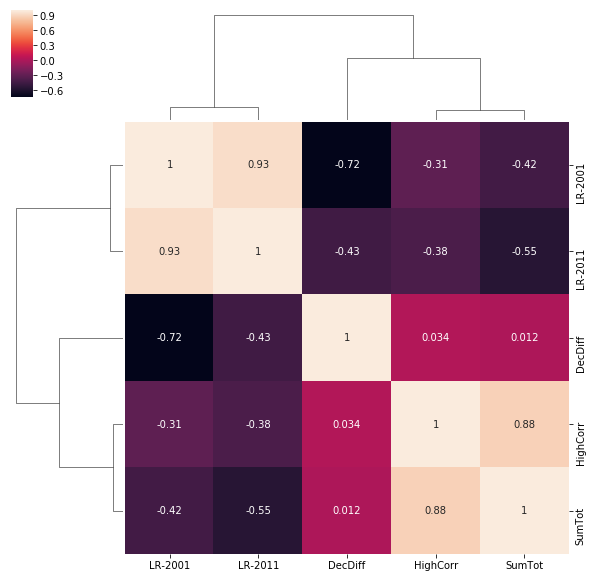

In [12]:
#Looking for coulmns with high correlation
sns.clustermap(fin[['HighCorr','SumTot','LR-2001','LR-2011','DecDiff']].corr(),annot=True)

#### Note
1. The decadel difference (the percentage by which the literacy rate has grown) has very low correlation with the total number of crimes committed. This might be because the literacy rates have been given only for the two years and the crimes vary over a large span of years.
2. The individual literacy rates have moderate correlation with the number of crimes committed. Thus, our next step is to analyse the relation between the literacy rate and only a few years.

Text(0, 0.5, 'Sum of all crimes')

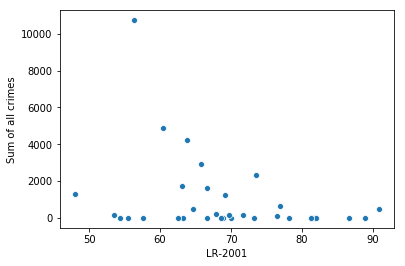

In [13]:
#Analysing the number of crimes in 2001 and that year's literacy rate.
ydrop_2001=ml[ml['Year']==2001].drop('Year',axis=1).groupby('STATE/UT').sum()
ydrop_2001.reset_index(inplace=True)
fin1=pd.merge(ydrop_2001,lr[['STATE/UT','LR-2001']])
sns.scatterplot(fin1['LR-2001'],fin1.drop('LR-2001',axis=1).sum(axis=1))
plt.ylabel('Sum of all crimes')

Text(0, 0.5, 'Sum of all crimes')

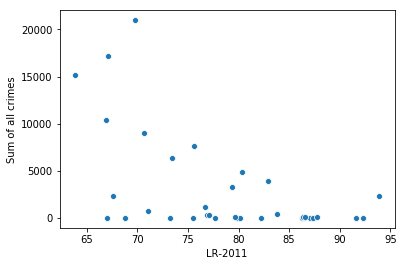

In [14]:
#Analysing the the number of crimes recorded from 2011 through 2013 and the literacy rate from the census of 2011.
ydrop11_13=ml[(ml["Year"]==2011)|(ml['Year']==2012)|(ml['Year']==2013)].drop(['Year','DISTRICT'],axis=1).groupby('STATE/UT').sum()
ydrop11_13.reset_index(inplace=True)
fin2=pd.merge(ydrop11_13,lr[['STATE/UT','LR-2011']])
sns.scatterplot(fin2['LR-2011'],fin2.drop('LR-2011',axis=1).sum(axis=1))
plt.ylabel('Sum of all crimes')

### Observations
1. The average literacy rate seems to have increased.
2. A trend of decreasing number of crimes with an increase in literacy rate can be observed
 

#### Analysing the data yearwise.

In [15]:
#The literacy rate has increased over the ten year gap. 
#Hopefully, this means that the number of incident crimes has also decreased.
lr.mean()


LR-2011    78.847500
LR-2001    70.057778
DecDiff     8.789722
dtype: float64

In [16]:
ywise=ml.drop(['STATE/UT','DISTRICT'],axis=1).groupby('Year').sum()
ywise.reset_index(inplace=True)
ywise

,Year,Murder,Assault on women,Kidnapping and Abduction,Dacoity,Robbery,Arson,Hurt,Prevention of atrocities (POA) Act,Protection of Civil Rights (PCR) Act,Other Crimes Against SCs
0,2001,763,1316,400,41,133,354,4547,13114,633,12201
1,2002,739,1332,318,29,105,322,4491,10770,1018,14383
2,2003,581,1089,232,24,70,204,3969,8048,634,11399
3,2004,654,1157,253,26,72,211,3824,8892,364,11435
4,2005,669,1172,258,26,80,210,3847,8497,291,11077
5,2006,673,1218,280,30,90,226,3762,8581,405,11811
6,2007,674,1349,332,23,86,238,3814,9819,206,13490
7,2008,622,1453,477,50,81,224,4134,11465,279,14645
8,2009,629,1350,511,42,67,195,4322,11037,168,15091
9,2010,572,1350,510,41,75,150,4344,10419,143,15039


Text(0, 0.5, 'Sum of all crimes committed')

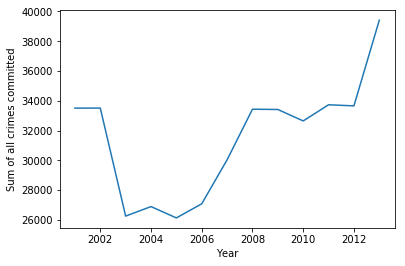

In [17]:
#Drawing a lineplot for the overall number of crimes every year, over the years.
sns.lineplot(x=ywise['Year'],y=ywise.drop('Year',axis=1).sum(axis=1),data=ywise)
plt.ylabel('Sum of all crimes committed')

#### Note-
Our hypothesis that the increase in literacy rate is associated with a decrease in hate crimes has been proved wrong. Though there has been a decrease in crimes till 2006, a rapid increase has been observed over the latter years.

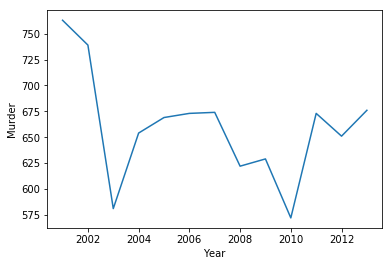

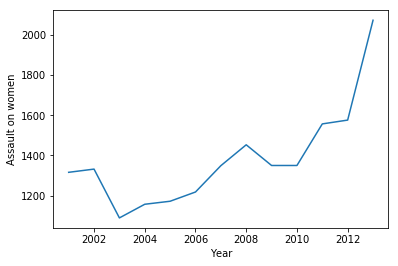

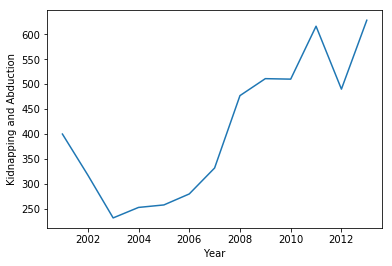

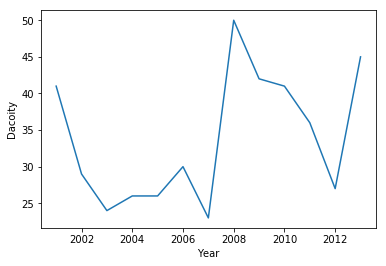

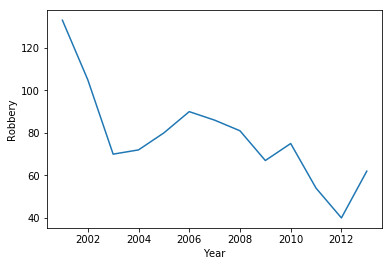

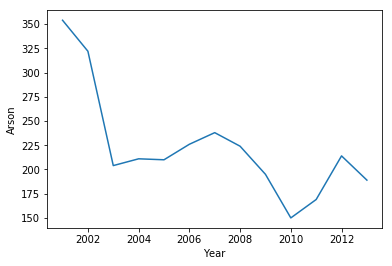

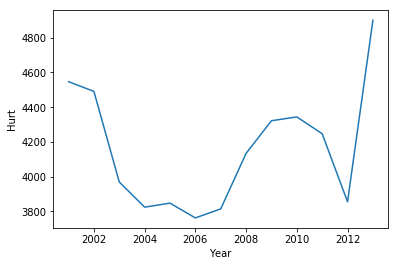

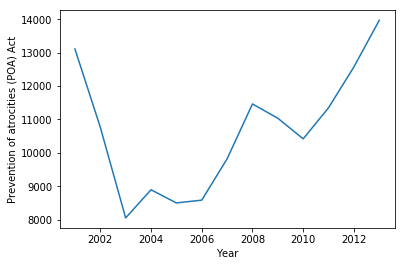

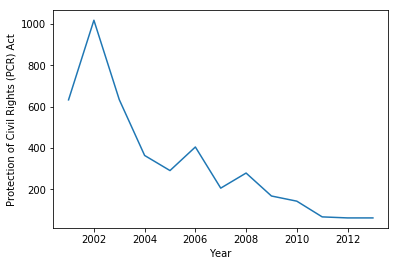

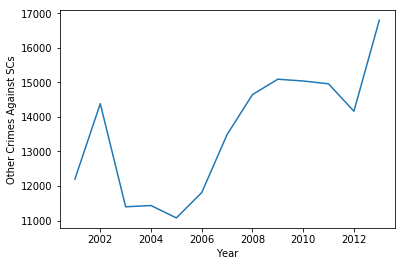

In [18]:
#Plotting line plots for each category of crime over the y
for x in ywise.columns:
    if x=='Year':
        continue
    plt.figure()
    sns.lineplot(x=ywise['Year'],y=ywise[x],data=ywise)
    plt.savefig(f'{x}.png')

#### Conclusion-
1) The increase in literacy rate can not be associated with the number of crimes incident over the years. This tells us that there are other variables at play. Even though people collectively as a whole were imparted with more knowledge, this could not overcome prejudices and stereotypes held by the masses at large.

2) Even with the above point being valid, states with higher literacy rates are prone to lesser number of crimes

3) Murders, cases of arson and cases breaking the PCR act have seen a decline in their incidences. However the other categories have seen a general increase or a gradual decline with sudden a sharp increase in the graphs.

4) Northern states of India are more prone to hate crimes.

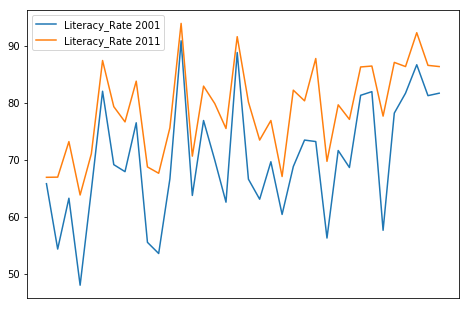

In [19]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.plot(lr['STATE/UT'],lr['LR-2001'],label='Literacy_Rate 2001')
ax.plot(lr['STATE/UT'],lr['LR-2011'],label='Literacy_Rate 2011')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)
ax.legend()

In [20]:
mur

,STATE/UT,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,ANDHRA PRADESH,2933,3385,3559,3255,3117,3891,3383,3998,4504,4321,4016
1,HIMACHAL PRADESH,110,97,107,89,55,92,91,71,88,101,94
2,TAMIL NADU,2336,2097,1495,1156,1206,991,1743,1618,1312,1631,1391
3,A&N ISLANDS,0,0,0,0,0,0,0,0,0,0,0
4,JHARKHAND,158,125,76,126,277,339,538,598,631,577,636
5,TRIPURA,2,0,0,1,38,14,8,4,7,11,22
6,LAKSHADWEEP,0,1,0,0,0,0,0,0,0,0,0
7,DELHI,19,16,13,5,21,21,24,34,33,16,38
8,WEST BENGAL,10,4,5,14,12,13,4,19,21,63,59
9,KARNATAKA,1621,1787,1844,1643,1780,1730,1844,2392,2174,2505,2481


In [21]:
tab=pd.merge(eco,mur,how='left',on='STATE/UT')

In [22]:
tab.dropna(inplace=True)

PermissionError: [Errno 13] Permission denied: 'Tab.csv'

In [ ]:
eco['GDP2001']


In [24]:
tab.corr()

,GDP2001,GDP2002,GDP2003,GDP2004,GDP2005,GDP2006,GDP2007,GDP2008,GDP2009,GDP2010,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
GDP2001,1.000000,0.999078,0.998611,0.995918,0.992886,0.991055,0.989315,0.991600,0.992298,0.989273,...,0.511118,0.476805,0.497872,0.551514,0.565949,0.578483,0.578528,0.558735,0.571292,0.564244
GDP2002,0.999078,1.000000,0.999019,0.997287,0.994991,0.993021,0.991419,0.993000,0.993840,0.990564,...,0.492117,0.452229,0.476688,0.531855,0.546993,0.561429,0.566493,0.544678,0.554437,0.549521
GDP2003,0.998611,0.999019,1.000000,0.998151,0.996104,0.994422,0.993025,0.994415,0.995162,0.992503,...,0.496506,0.465452,0.486611,0.539951,0.552702,0.563301,0.563564,0.544261,0.555792,0.548781
GDP2004,0.995918,0.997287,0.998151,1.000000,0.999314,0.998415,0.997632,0.998053,0.998195,0.996702,...,0.476486,0.451039,0.470688,0.524435,0.535981,0.548508,0.550583,0.530086,0.543367,0.534582
GDP2005,0.992886,0.994991,0.996104,0.999314,1.000000,0.999542,0.998852,0.998567,0.998678,0.997638,...,0.462088,0.438898,0.456305,0.510471,0.520782,0.533103,0.535121,0.513918,0.527832,0.518576
GDP2006,0.991055,0.993021,0.994422,0.998415,0.999542,1.000000,0.999492,0.998979,0.998890,0.998563,...,0.456184,0.438664,0.455143,0.507128,0.517113,0.529643,0.530127,0.509716,0.524836,0.513817
GDP2007,0.989315,0.991419,0.993025,0.997632,0.998852,0.999492,1.000000,0.999260,0.998370,0.998449,...,0.446887,0.434915,0.450616,0.502614,0.513804,0.523480,0.525563,0.506106,0.521528,0.508790
GDP2008,0.991600,0.993000,0.994415,0.998053,0.998567,0.998979,0.999260,1.000000,0.999328,0.999114,...,0.468880,0.457796,0.474140,0.524720,0.536174,0.545238,0.546334,0.527685,0.543742,0.530255
GDP2009,0.992298,0.993840,0.995162,0.998195,0.998678,0.998890,0.998370,0.999328,1.000000,0.999321,...,0.473595,0.454814,0.472450,0.524212,0.534658,0.546743,0.547723,0.527999,0.542801,0.531172
GDP2010,0.989273,0.990564,0.992503,0.996702,0.997638,0.998563,0.998449,0.999114,0.999321,1.000000,...,0.467575,0.460224,0.476398,0.525249,0.535304,0.546156,0.545935,0.528405,0.545359,0.530551


In [25]:
tab['GDP2001']

0     156711.0
1       2104.0
2      38313.0
3      57657.0
4      29539.0
5       7097.0
6     123573.0
7      65505.0
8      17148.0
9      18039.0
10     35069.0
11    112847.0
12     77924.0
13     86745.0
14    273188.0
15      3369.0
16      4478.0
17      1947.0
18      3972.0
19     46756.0
20     79611.0
21     91771.0
22      1136.0
23    148861.0
24      6370.0
25    190269.0
26     15144.0
27    157144.0
28      1082.0
29      5490.0
30     65027.0
31      4259.0
Name: GDP2001, dtype: float64

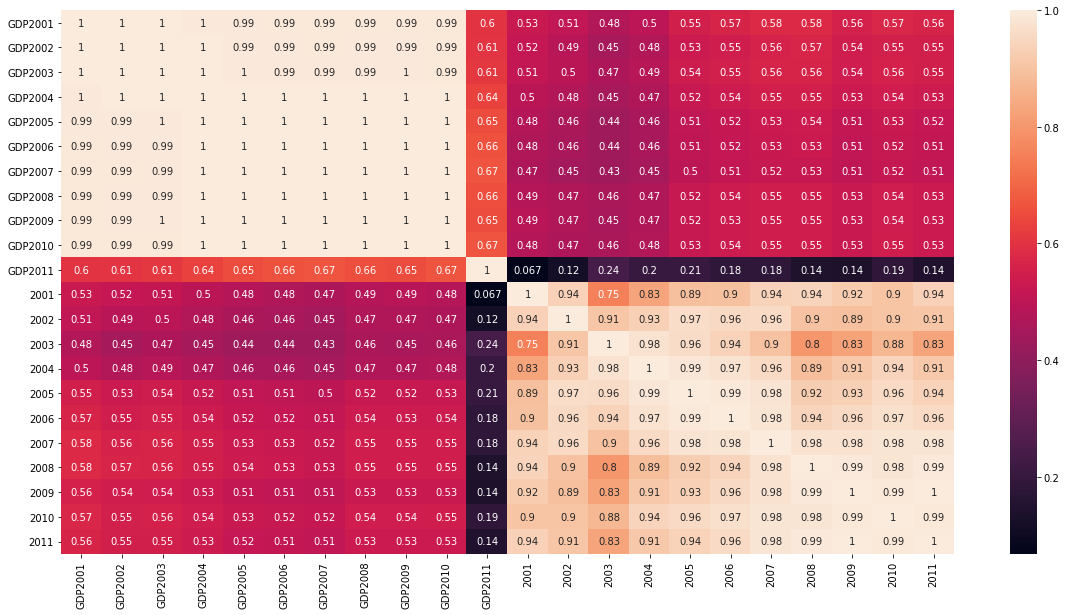

In [31]:
plt.figure(figsize=(20,10))
sns.heatmap(tab.corr(),annot=True)